### Question 1
Exercise 8.8 from Newman asks us to consider "space garbage", a sphere moving around a rod and solve for the trajectory of this sphere in (x,y) plane. We will do it via converting the $2^{nd}$ order ODEs(given in Part A of the exercise) into first order ODEs in order to solve them. The equations of emotion given are: 
\begin{equation}
\frac { \mathrm { d } ^ { 2 } x } { \mathrm { d } t ^ { 2 } } = - G M \frac { x } { r ^ { 2 } \sqrt { r ^ { 2 } + L ^ { 2 } / 4 } }
\end{equation}
and 
\begin{equation}
\frac { \mathrm { d } ^ { 2 } y } { \mathrm { d } t ^ { 2 } } = - G M \frac { y } { r ^ { 2 } \sqrt { r ^ { 2 } + L ^ { 2 } / 4 } }
\end{equation}
in terms of acceleration. 

##### Reducing Order of Differential Equations from 8.3 
The method describes defining a new quantity as the derivivative and then writing the function in terms of that. Therefore, our functions can now be written in terms of the velocity.
\begin{equation}
\frac { \mathrm { d }  V_x } { \mathrm { d } t  } = - G M \frac { x } { r ^ { 2 } \sqrt { r ^ { 2 } + L ^ { 2 } / 4 } }
\end{equation}
and 
\begin{equation}
\frac { \mathrm { d } V_y } { \mathrm { d } t  } = - G M \frac { y } { r ^ { 2 } \sqrt { r ^ { 2 } + L ^ { 2 } / 4 } }
\end{equation} 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [29]:
#Defining Constants
f_G = 1.0       # gravitaional constant
f_M = 10.0      # mass
f_L = 2.0       # length of rod
#Defining Initial Conditions
f_x_init = 1.0  # x position
f_y_init = 0.0  # y position
t_naught = 0.0  # time inital
t_final = 10.0  # time final
v_x_init = 0.0  # x velocity 
v_y_init = 1.0  # y velocity
N = 1000        # number of steps
h = (t_final - t_naught)/N                         # step size
tpoints = np.arange(t_naught,t_final,h)            # empty time array
r = np.array([f_x_init,f_y_init,v_x_init,v_y_init],float)    # initial conditions
solution = np.empty(tpoints.shape + r.shape,float) # 

In [40]:
# Newman's ODEsim algorithim using RK4
def Function(a_r,t):
    '''
    This function is the combination of the four 
    single order ODE's explained above
    Input:
    a_r: An array of the four variables , x, y, x velocity, and y velocity
    t  : Time as the independent variable
    Output: 
    The derivatives of the four variables:
    x velocity, y velocity, x acceleration, y accelration
    '''
    
    x,y,v_x, v_y = a_r  # unpacking variables
    # Redefined derivatives
    x_velocity = v_x   # self explanatory 
    y_velocity = v_y   # self explanatory
    
    R = np.sqrt(x**2+y**2)  # the displacement vector
    a_coefficents = - f_G*f_M/R/np.sqrt(R**2 + f_L**2/4.)
    # above equation is the coefficents of
    # acceleration equation from Newman
    x_acceleration = a_coefficents * x/R  # self explanatory 
    y_acceleration = a_coefficents * y/R  # self explanatory

    return np.array([x_velocity,y_velocity,x_acceleration,y_acceleration])




In [41]:
# Newman's Simulatenous ODE Solver
# Using 4th Order Runge-Kutta Method
for i,t in enumerate(tpoints):
    solution[i]=r
    k1 = h*Function(r,t)
    k2 = h*Function(r+0.5*k1,t+0.5*h)
    k3 = h*Function(r+0.5*k2,t+0.5*h)
    k4 = h*Function(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

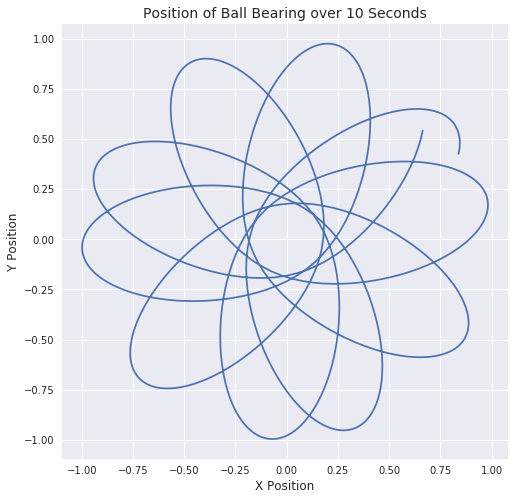

In [42]:
plt.figure(figsize = (8,8))
plt.plot(solution[:,0],solution[:,1])
plt.title('Position of Ball Bearing over 10 Seconds',\
          fontsize = 14)
plt.ylabel('Y Position',fontsize = 12)
plt.xlabel('X Position',fontsize = 12)
plt.show()